In [143]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.model_selection import cross_validate

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore') 

In [145]:
df0 = pd.read_csv('final_scout_not_dummy.csv')
df = df0.copy()

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,Diesel,7.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.00,2.00,66.00,1,Metallic,Cloth,Automatic,1422.00,1220.00,front,3.80
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,Benzine,7.00,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.00,1.00,141.00,0,Metallic,Cloth,Automatic,1798.00,1255.00,front,5.60
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,Diesel,7.00,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.00,1.00,85.00,0,Metallic,Cloth,Automatic,1598.00,1135.00,front,3.80
3,Audi A1,Sedans,14500,VAT deductible,73000.00,Used,Diesel,6.00,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.00,1.00,66.00,0,Metallic,Cloth,Automatic,1422.00,1195.00,front,3.80
4,Audi A1,Sedans,16790,VAT deductible,16200.00,Used,Diesel,7.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.00,1.00,66.00,1,Metallic,Cloth,Automatic,1422.00,1135.00,front,4.10


In [4]:
df.shape

(15915, 23)

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   type                 15915 non-null  object 
 6   fuel                 15915 non-null  object 
 7   gears                15915 non-null  float64
 8   comfort_convenience  15915 non-null  object 
 9   entertainment_media  15915 non-null  object 
 10  extras               15915 non-null  object 
 11  safety_security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  previous_owners      15915 non-null  float64
 14  hp_kw                15915 non-null  float64
 15  inspection_new       15915 non-null 

In [7]:
df.duplicated().sum()

1673

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(14242, 23)

In [11]:
df['make_model'].value_counts()

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: make_model, dtype: int64

In [12]:
drop_model = df['make_model'].value_counts()[df['make_model'].value_counts() <= 100].index
drop_model

# gözlem sayısı 100 ve altında olan marka-modelleri listesini çıkarıyoruz. 
# Bu listedeki modellere ait gözlemleri datamızdan drop edeceğiz.

Index(['Renault Duster', 'Audi A2'], dtype='object')

In [13]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)
    
# drop_model listesindeki tüm modelleri sıra ile çekip bu modellere ait gözlemlerin önce indexlerini buluyoruz.
# Bulduğumuz indexleri her seferinde datamızdan drop ediyoruz.
# son aşamada silinen indexler datamızda görünmeyeceği için 0'dan başlayacak şekilde indexleri resetliyoruz.

In [14]:
df['make_model'].value_counts()

# 100'den daha az gözlemi olan modellerin drop edildiğini gördük.

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: make_model, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14221 entries, 0 to 14220
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14221 non-null  object 
 1   body_type            14221 non-null  object 
 2   price                14221 non-null  int64  
 3   vat                  14221 non-null  object 
 4   km                   14221 non-null  float64
 5   type                 14221 non-null  object 
 6   fuel                 14221 non-null  object 
 7   gears                14221 non-null  float64
 8   comfort_convenience  14221 non-null  object 
 9   entertainment_media  14221 non-null  object 
 10  extras               14221 non-null  object 
 11  safety_security      14221 non-null  object 
 12  age                  14221 non-null  float64
 13  previous_owners      14221 non-null  float64
 14  hp_kw                14221 non-null  float64
 15  inspection_new       14221 non-null 

In [16]:
df_object = df.select_dtypes(include = "object")
df_object.info()

# select_dtypes(include ="object") kodu ile sadece df'deki object featurları filtreleyebiliyoruz. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14221 entries, 0 to 14220
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           14221 non-null  object
 1   body_type            14221 non-null  object
 2   vat                  14221 non-null  object
 3   type                 14221 non-null  object
 4   fuel                 14221 non-null  object
 5   comfort_convenience  14221 non-null  object
 6   entertainment_media  14221 non-null  object
 7   extras               14221 non-null  object
 8   safety_security      14221 non-null  object
 9   paint_type           14221 non-null  object
 10  upholstery_type      14221 non-null  object
 11  gearing_type         14221 non-null  object
 12  drive_chain          14221 non-null  object
dtypes: object(13)
memory usage: 1.4+ MB


In [17]:
for col in df_object:
    print(f"{col:<20}:", df[col].nunique())

# her feature ın kaç unique gözlemden oluştuğunu görüyoruz.

# <30 ile en soldan ":" işaretine kadar 30 karakterlik boşluk bırakılır ve feature isimleri bu boşluğa yazdırılır.
# ":" işareti tüm satırlarda aynı hizaya getirilmiş olur.

make_model          : 7
body_type           : 8
vat                 : 2
type                : 5
fuel                : 4
comfort_convenience : 6195
entertainment_media : 346
extras              : 659
safety_security     : 4441
paint_type          : 3
upholstery_type     : 2
gearing_type        : 3
drive_chain         : 3


### `'comfort_convenience'`

In [18]:
df['comfort_convenience']

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
14216    Air conditioning,Armrest,Automatic climate con...
14217    Air conditioning,Automatic climate control,Cru...
14218    Air conditioning,Armrest,Automatic climate con...
14219    Air conditioning,Automatic climate control,Cru...
14220    Air conditioning,Armrest,Automatic climate con...
Name: comfort_convenience, Length: 14221, dtype: object

In [19]:
premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Multi-function", "Navigation ", "Keyless central door lock", "Heads-up", "Massage seats",
                "heating", "Automatic climate control", "Heated"]

df['comfort_convenience'] = df['comfort_convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))

In [20]:
df['comfort_convenience'].value_counts()

Standard        9648
Premium         4510
Premium Plus      63
Name: comfort_convenience, dtype: int64

### `'entertainment_media'`

In [21]:
df['entertainment_media']

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
14216    Bluetooth,Digital radio,Hands-free equipment,O...
14217    Bluetooth,Digital radio,Hands-free equipment,O...
14218    Bluetooth,Digital radio,Hands-free equipment,M...
14219    Bluetooth,Digital radio,Hands-free equipment,R...
14220    Bluetooth,Hands-free equipment,On-board comput...
Name: entertainment_media, Length: 14221, dtype: object

In [22]:
media_plus = ["Digital radio", "Hands-free", "Television"]

df['entertainment_media'] = df['entertainment_media'].apply(lambda sentence: "Plus" if any(word in sentence for word in media_plus) else "Standard")

In [23]:
df['entertainment_media'].value_counts()

Plus        9769
Standard    4452
Name: entertainment_media, dtype: int64

### `'safety_security'`

In [24]:
df['safety_security']

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
14216    ABS,Adaptive Cruise Control,Central door lock,...
14217    ABS,Central door lock,Central door lock with r...
14218    ABS,Adaptive Cruise Control,Blind spot monitor...
14219    ABS,Adaptive Cruise Control,Blind spot monitor...
14220    ABS,Adaptive Cruise Control,Blind spot monitor...
Name: safety_security, Length: 14221, dtype: object

In [25]:
premium = ["Tire pressure", "Traction control", "Daytime running lights", "LED Headlight", "Tire pressure"]
premium_plus = ["Emergency brake assistant", "Electronic stability control"]

df['safety_security'] = df['safety_security'].apply(lambda sentence: "Safety Premium Package" if any(word in sentence for word in premium) else ("Safety Premium Plus Package" if any(word in sentence for word in premium_plus) else "Safety Standard Package"))

In [26]:
df['safety_security'].value_counts()

Safety Premium Package         13089
Safety Premium Plus Package      727
Safety Standard Package          405
Name: safety_security, dtype: int64

### `'extras'`

In [27]:
for i in df['extras']:
    print(i)

Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels,Sport seats,Sport suspension,Voice Control
Alloy wheels,Voice Control
Alloy wheels,Sport seats,Voice Control
Alloy wheels,Sport package,Sport suspension,Voice Control
Alloy wheels,Sport package,Sport seats,Sport suspension
Alloy wheels,Sport package,Sport seats,Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels,Shift paddles
Alloy wheels,Sport seats
Alloy wheels,Catalytic Converter,Sport package,Sport seats,Sport suspension,Voice Control
Alloy wheels,Sport seats,Sport suspension
Alloy wheels,Sport seats,Sport suspension
Alloy wheels
Alloy wheels,Sport package,Sport seats
Alloy wheels,Sport package
Alloy wheels
Alloy wheels,Catalytic Converter,Shift paddles,Voice Control
Alloy wheels,Shift paddles,Sport package,Voice Control
Alloy wheels,Sport seats,Voice Control
Alloy wheels,Catalytic Converter,Sport seats,Voice Control,Winter tyres
Alloy wheels
Alloy wheels,Voice Control
Alloy wheels,Winter tyres
Alloy wheel

Alloy wheels
Alloy wheels,Catalytic Converter,Touch screen,Voice Control
Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels
Alloy wheels,Catalytic Converter,Touch screen,Voice Control
Alloy wheels
Touch screen,Voice Control
Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels,Catalytic Converter,Sport package,Sport suspension,Voice Control
Alloy wheels,Catalytic Converter
Alloy wheels
Voice Control
Alloy wheels,Voice Control
Catalytic Converter,Voice Control
Alloy wheels
Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels,Touch screen,Voice Control
Alloy wheels,Catalytic Converter,Touch screen,Voice Control
Alloy wheels,Touch screen,Voice Control
Alloy wheels
Alloy wheels
Alloy wheels,Catalytic Converter
Alloy wheels
Alloy wheels,Voice Control
Alloy wheels,Voice Control
Alloy wheels,Voice Control
Alloy wheels
Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels,Voice Control
Alloy wheels
Alloy wheels
Alloy wh

Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels,Catalytic Converter
Alloy wheels,Catalytic Converter
Alloy wheels
Alloy wheels,Catalytic Converter,Shift paddles,Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels,Catalytic Converter
Alloy wheels,Catalytic Converter,Shift paddles,Voice Control
Alloy wheels,Catalytic Converter,Shift paddles,Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels,Sport suspension
Alloy wheels,Sport suspension,Voice Control
Alloy wheels,Sport seats,Sport suspension
Sport suspension
Alloy wheels
Alloy wheels
Alloy wheels,Catalytic Converter,Voice Control
Alloy wheels
Alloy wheels,Voice Control
Alloy wheels,Voice Control
Alloy wheels,Sport seats,Voice Control
Alloy wheels
Alloy wheels
Alloy wheels,Catalytic Converter
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels,Sport seats,Sport suspension
All

Touch screen,Voice Control
Alloy wheels
Alloy wheels,Roof rack,Sport seats
Roof rack
Roof rack,Touch screen
Catalytic Converter
Alloy wheels
Alloy wheels,Touch screen
Alloy wheels,Roof rack,Touch screen
Alloy wheels,Touch screen
Alloy wheels
Roof rack,Touch screen
Alloy wheels
Alloy wheels,Cab or rented Car,Touch screen,Voice Control
Alloy wheels
Alloy wheels,Touch screen
Roof rack
Alloy wheels,Touch screen,Voice Control
Alloy wheels,Touch screen,Voice Control
Alloy wheels
Alloy wheels,Roof rack,Touch screen,Voice Control
Alloy wheels,Roof rack,Touch screen,Voice Control
Roof rack
Alloy wheels
Alloy wheels
Alloy wheels,Touch screen
Touch screen
Roof rack,Touch screen
Alloy wheels,Touch screen
Alloy wheels,Touch screen
Alloy wheels,Roof rack
Touch screen
Touch screen
Alloy wheels,Cab or rented Car,Catalytic Converter
Cab or rented Car,Touch screen,Voice Control
Alloy wheels,Cab or rented Car,Catalytic Converter,Touch screen
Alloy wheels,Cab or rented Car,Catalytic Converter
Alloy wheels

Alloy wheels,Catalytic Converter,Touch screen,Voice Control
Alloy wheels,Roof rack,Sport seats
Alloy wheels
Alloy wheels,Touch screen
Alloy wheels
Alloy wheels,Touch screen,Voice Control
Alloy wheels,Roof rack,Touch screen,Trailer hitch,Voice Control
Alloy wheels,Roof rack,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Voice Control
Alloy wheels,Catalytic Converter,Roof rack,Touch screen,Voice Control
Alloy wheels
Alloy wheels,Roof rack,Shift paddles,Sport seats,Sport suspension,Touch screen,Trailer hitch,Voice Control
Alloy wheels,Roof rack,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Voice Control
Alloy wheels,Roof rack,Sport package,Sport seats
Alloy wheels,Roof rack,Touch screen
Alloy wheels
Alloy wheels,Roof rack,Voice Control
Alloy wheels,Catalytic Converter,Touch screen
Alloy wheels
Alloy wheels
Touch screen,Voice Control
Alloy wheels,Voice Control
Roof rack
Alloy wheels
Alloy wheels,Roof rack,Touch screen
Roof rack

Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Sport package
Alloy wheels,Shift paddles,Sport package,Sport seats,Touch screen,Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Touch screen
Alloy wheels,Touch screen
Roof rack
Alloy wheels
Roof rack
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels,Roof rack,Touch screen
Alloy wheels,Trailer hitch
Alloy wheels,Roof rack,Touch screen
Alloy wheels
Alloy wheels
Alloy wheels,Roof rack,Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Roof rack,Touch screen
Alloy wheels
Alloy wheels
Alloy wheels
Voice Control
Alloy wheels
Touch screen
Roof rack
Alloy wheels
Alloy wheels
Alloy wheels,Voice Control
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Roof rack
Alloy wheels
Alloy wheels
Catalytic Converter,Winter tyres
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Alloy wheels
Roof rack,Touch screen,Voice Control
Catalytic Converter
Roof rack
Alloy wh

In [28]:
df["extras"] = [len(i.split(',')) for i in df['extras']]

In [29]:
df["extras"]

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: extras, Length: 14221, dtype: int64

In [30]:
df['extras'].nunique()

10

In [31]:
df_object = df.select_dtypes(include = "object")
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14221 entries, 0 to 14220
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           14221 non-null  object
 1   body_type            14221 non-null  object
 2   vat                  14221 non-null  object
 3   type                 14221 non-null  object
 4   fuel                 14221 non-null  object
 5   comfort_convenience  14221 non-null  object
 6   entertainment_media  14221 non-null  object
 7   safety_security      14221 non-null  object
 8   paint_type           14221 non-null  object
 9   upholstery_type      14221 non-null  object
 10  gearing_type         14221 non-null  object
 11  drive_chain          14221 non-null  object
dtypes: object(12)
memory usage: 1.3+ MB


In [32]:
for col in df_object:
    print(f"{col:<20}:", df[col].nunique())

make_model          : 7
body_type           : 8
vat                 : 2
type                : 5
fuel                : 4
comfort_convenience : 3
entertainment_media : 2
safety_security     : 3
paint_type          : 3
upholstery_type     : 2
gearing_type        : 3
drive_chain         : 3


---

---

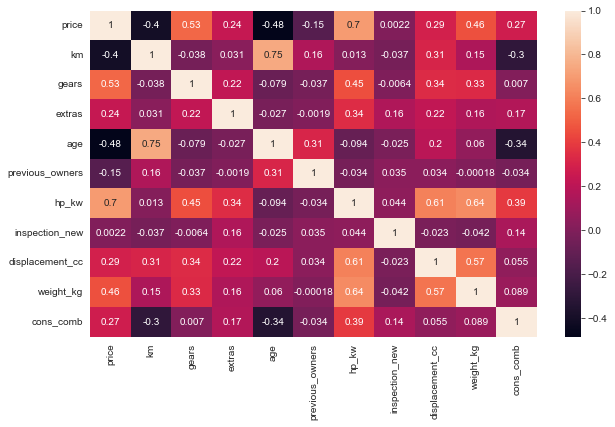

In [33]:
df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True);

# select_dtypes(include ="number") kodu ile sadece df'deki object featurları filtreleyebiliyoruz.

## Outliers in Price Column

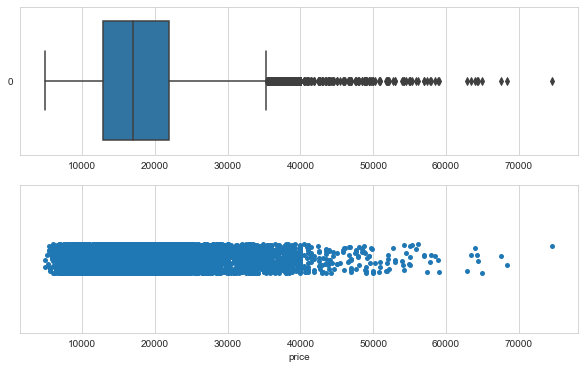

In [34]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price, orient='h')

plt.subplot(212)
sns.stripplot(df.price, orient='h');

# Boxplot üzerinden de outlierlar hakkında insghtlar elde edebiliriz. Ancak bu insghtlar bizi yanıltabilir. Daha doğru
# yorumlar yapabilmek için kategorik verilerin dağılımını gösteren stripplotu kullanabiliriz. Boxplot 50 bin EURO
# ve üzeri fiyatlı arablara outlier muamelesi yapsada stripplot bize 50 bin EURO ve civarında olan araba sayısının çok da
# az olmadığını söylüyor. Ama yukarıda da söylediğimiz gibi değerlendirmemizi datanın geneli için değil. Datadaki
# gruplara (Opel Astra, Ford Fiesta, Volvo S60 vb) göre yapacağız.

In [35]:
from ipywidgets import interact

def box_strip(model):
    sns.boxplot(data = df[df['make_model'] == model],
                x = "make_model",
                y = "price",
                palette = 'tab20c')
    
    sns.stripplot(data = df[df['make_model'] == model],
                x = "make_model",
                y = "price",
                palette = 'Set1')
    
model = df['make_model'].unique()

interact(box_strip, model=model);

# Bu kod, ipywidgets ve seaborn kütüphanelerini kullanarak etkileşimli bir boxplot ve stripplot grafiği çizme işlevini tanımlar.
# İşlev, data kapsamında olan farklı araba modellerinin fiyatlarını gösteren boxplot ve stripplot grafiğini üst üste çizer.
# interact() fonksiyonu, kullanıcının arayüz üzerinden seçim yaparak box_strip fonksiyonunun çalışmasına izin verir.
# Bu seçim, grafiği çizmek için kullanılacak araba modelini belirler.

interactive(children=(Dropdown(description='model', options=('Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa',…

In [36]:
total_outliers = []

for model in df["make_model"].unique():
    
    car_prices = df[df["make_model"] == model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<20} : {count_of_outliers:<3}  ----->  The rate of outliers : {(count_of_outliers / len(df[df['make_model'] == model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

# 1.5 wisker değerine göre her bir gruba ait outlier olabileceğini değerlendirdiğimiz verileri tespit ediyoruz.

 The count of outlier for Audi A1              : 5    ----->  The rate of outliers : 0.002
 The count of outlier for Audi A3              : 56   ----->  The rate of outliers : 0.02
 The count of outlier for Opel Astra           : 127  ----->  The rate of outliers : 0.055
 The count of outlier for Opel Corsa           : 0    ----->  The rate of outliers : 0.0
 The count of outlier for Opel Insignia        : 109  ----->  The rate of outliers : 0.045
 The count of outlier for Renault Clio         : 37   ----->  The rate of outliers : 0.025
 The count of outlier for Renault Espace       : 20   ----->  The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


# Train-Test Split

In [37]:
X= df.drop(columns="price")
y= df.price

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas")

# Pipemodel 

In [41]:
import xgboost as xgb

xgb.__version__

'1.7.5'

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred, squared=True),                          
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred, squared=True),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}
    
    return pd.DataFrame(scores)

In [42]:
cat = X.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'],
      dtype='object')

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [44]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain']...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [45]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.98,0.95
mae,741.95,1094.30
mse,1091214.06,2960277.88
rmse,1044.61,1720.55


In [46]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10,
                        return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.94
train_r2                                   0.98
test_neg_mean_absolute_error           -1108.65
train_neg_mean_absolute_error           -714.18
test_neg_mean_squared_error         -3104942.78
train_neg_mean_squared_error         -991842.75
test_neg_root_mean_squared_error       -1756.68
train_neg_root_mean_squared_error       -995.89
dtype: float64

In [48]:
995.89/y.mean()

# train datasında ortalama yaklaşık %5 hata yapıyor.

0.05499898990573291

In [47]:
1756.68/y.mean()

# test datasında ortalama yaklaşık %9 hata yapıyor.

0.09701435458494702

# Gridsearch

In [49]:
param_grid = {"XGB_model__n_estimators":[30,35],
              "XGB_model__max_depth":[2, 3], 
              "XGB_model__learning_rate": [0.055, 0.06],
              "XGB_model__subsample": [0.5, 0.8], 
              "XGB_model__colsample_bytree":[0.5, 0.8, 1],
              "XGB_model__colsample_bylevel":[0.5, 0.8, 1]
              }

In [51]:
from sklearn.model_selection import GridSearchCV
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [52]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type',...
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [0.5, 0.8, 1],
                         'XGB_model__colsample_bytree': [0.5, 0.8, 1],
                         'XGB_model__learning_rate': [0.055, 0.06],
                         'XGB_model__max_depth': [2, 3],
                         'XGB_model__n_estimators': [30, 35],
                         'XGB_model__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [53]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.06,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 35,
 'XGB_model__subsample': 0.8}

In [54]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain']...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=35,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [55]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3661.52
mean_train_score   -3637.81
Name: 127, dtype: object

In [56]:
prediction = grid_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, prediction, squared=False)

train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.76,0.75
mae,2553.55,2584.76
mse,13282977.91,13704847.80
rmse,3644.58,3702.01


# Gridsearch 2

In [57]:
param_grid = {"XGB_model__n_estimators":[35, 40, 45],
              "XGB_model__max_depth":[3, 4, 5], 
              "XGB_model__learning_rate": [0.06, 0.07, 0.09],
              "XGB_model__subsample": [0.8, 0.9, 1], 
              "XGB_model__colsample_bytree":[0.8],
              "XGB_model__colsample_bylevel":[1, 1.2, 1.5]
              }

In [58]:
from sklearn.model_selection import GridSearchCV
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [59]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type',...
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [1, 1.2, 1.5],
                         'XGB_model__colsample_bytree': [0.8],
                         'XGB_model__learning_rate': [0.06, 0.07, 0.09],
                         'XGB_model__max_depth': [3, 4, 5],
                         'XGB_model__n_estimators': [35, 40, 45],
                         'XGB_model__subsample': [0.8, 0.9, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [60]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain']...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.09,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=45,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [63]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.09,
 'XGB_model__max_depth': 5,
 'XGB_model__n_estimators': 45,
 'XGB_model__subsample': 1}

In [61]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2021.91
mean_train_score   -1851.81
Name: 80, dtype: object

In [62]:
prediction = grid_model.predict(X_test)

ada_rmse = mean_squared_error(y_test, prediction, squared=False)


train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.94,0.92
mae,1257.09,1307.53
mse,3476382.67,4113878.94
rmse,1864.51,2028.27


# Gridsearch 3

In [64]:
param_grid = {"XGB_model__n_estimators":[45, 50, 55],
              "XGB_model__max_depth":[5], 
              "XGB_model__learning_rate": [0.09, 1, 1.2, 1.5],
              "XGB_model__subsample": [1], 
              "XGB_model__colsample_bytree":[0.8],
              "XGB_model__colsample_bylevel":[1]
              }

In [65]:
from sklearn.model_selection import GridSearchCV
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [66]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type',...
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [1],
                         'XGB_model__colsample_bytree': [0.8],
                         'XGB_model__learning_rate': [0.09, 1, 1.2, 1.5],
                         'XGB_model__max_depth': [5],
                         'XGB_model__n_estimators': [45, 50, 55],
                         'XGB_model__subsample': [1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [67]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain']...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.09,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=55,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [68]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.09,
 'XGB_model__max_depth': 5,
 'XGB_model__n_estimators': 55,
 'XGB_model__subsample': 1}

In [69]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -1956.96
mean_train_score   -1756.93
Name: 2, dtype: object

In [70]:
prediction = grid_model.predict(X_test)

ada_rmse = mean_squared_error(y_test, prediction, squared=False)


train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.94,0.93
mae,1201.62,1258.75
mse,3169122.04,3827095.55
rmse,1780.20,1956.30


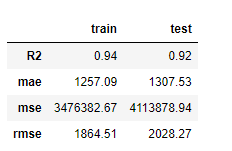 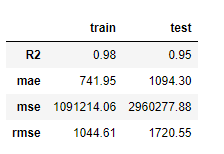

# Feature Importance

In [72]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(n_estimators=55,
                                         learning_rate=0.09, 
                                         max_depth=5,
                                         subsample=1, 
                                         colsample_bylevel = 1,
                                         colsample_bytree = 0.8,
                                         random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain']...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.09,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=55,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [73]:
pipe_model["XGB_model"].feature_importances_

array([0.11406426, 0.00586776, 0.00208215, 0.02290977, 0.00368712,
       0.00777541, 0.00116323, 0.0029057 , 0.00125931, 0.02876175,
       0.02191693, 0.00407436, 0.04455991, 0.1432024 , 0.003265  ,
       0.15856007, 0.00328237, 0.36645243, 0.00612443, 0.01998718,
       0.02885045, 0.0092481 ], dtype=float32)

In [76]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['make_model', 'body_type', 'vat', 'type', 'fuel',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'paint_type', 'upholstery_type', 'gearing_type', 'drive_chain',
       'km', 'gears', 'extras', 'age', 'previous_owners', 'hp_kw',
       'inspection_new', 'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype=object)

In [77]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_,
                         columns=['xgb_Importance'],
                         index=features)

xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
hp_kw,0.37
age,0.16
gears,0.14
make_model,0.11
km,0.04
weight_kg,0.03
upholstery_type,0.03
type,0.02
gearing_type,0.02
displacement_cc,0.02


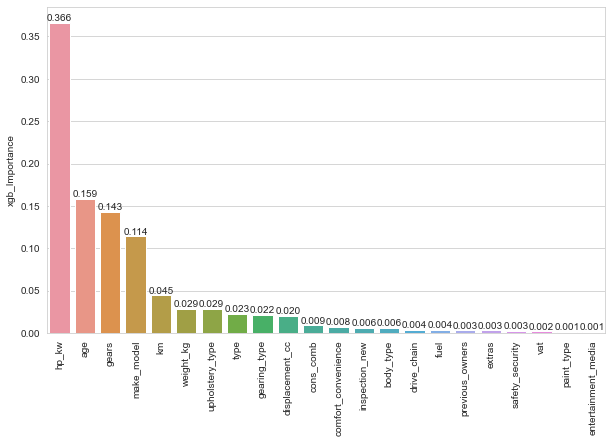

In [78]:
ax = sns.barplot(data=xgb_imp_feats, 
                 x=xgb_imp_feats.index, 
                 y='xgb_Importance')

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

# Final Model

In [100]:
feat_imp_last = xgb_imp_feats.head().index


In [146]:
df1 = df[["make_model", "age", "km", "hp_kw", "gears", "price"]]

KeyError: "['hp_kw', 'gears'] not in index"

In [117]:
X=df1.drop("price", axis=1)
y=df1.price

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

In [122]:
cat = ['make_model']
cat

['make_model']

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc,cat), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(n_estimators=55,
                                         learning_rate=0.09, 
                                         max_depth=5,
                                         subsample=1, 
                                         colsample_bylevel = 1,
                                         colsample_bytree = 0.8,
                                         random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['make_model'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=1, colsample_bynode=None,
                              colsample_b...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.09,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=55,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

# Prediction

In [126]:
df1 = df[["make_model", "age", "km", "hp_kw", "gears", "price"]]
df1.sample(10)

,make_model,age,km,hp_kw,gears,price
2205,Audi A1,0.00,10.00,85.00,6.00,19388
13774,Renault Espace,1.00,20900.00,118.00,6.00,28500
13175,Renault Clio,1.00,22740.00,66.00,5.00,10000
10396,Opel Insignia,2.00,14980.00,100.00,6.00,19895
6188,Opel Astra,2.00,44000.00,81.00,6.00,11999
304,Audi A1,3.00,110375.00,66.00,7.00,13480
5532,Opel Astra,3.00,33208.00,77.00,5.00,10750
5900,Opel Astra,2.00,80754.00,70.00,6.00,10999
12806,Renault Clio,2.00,40000.00,66.00,5.00,9800
2300,Audi A1,0.00,10.00,85.00,5.00,22490


In [159]:
df1.gears.max()

8.0

In [160]:
df1.gears.min()

5.0

In [152]:
df.km.min()

0.0

In [129]:
df.gears.unique()

array([7., 6., 5., 8.])

In [130]:
samples = {"make_model": ["Audi A1", "Renault Clio"],
           "age": [1, 3],
           "km":[20700, 21000],
           'hp_kw':[65, 121],
           'gears': [5,7]
          }

In [131]:
df_samples = pd.DataFrame(samples)
df_samples

,make_model,age,km,hp_kw,gears
0,Audi A1,1,20700,65,5
1,Renault Clio,3,21000,121,7


In [132]:
pipe_model.predict(df_samples)

array([15999.795, 19856.766], dtype=float32)

In [ ]:
# Compare with real value.

In [133]:
sample = {"make_model": ["Opel Insignia"],
           "age": [2],
           "km":[14980],
           'hp_kw':[100],
           'gears': [6]
          }

In [135]:
df_sample = pd.DataFrame(sample)
df_sample

,make_model,age,km,hp_kw,gears
0,Opel Insignia,2,14980,100,6


In [136]:
pipe_model.predict(df_sample)

array([17894.602], dtype=float32)

In [138]:
import pickle

In [140]:
pickle.dump(pipe_model, open('model', 'wb'))

In [142]:
df1.to_csv("model_son.csv", index=False)

In [149]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)